### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [38]:
data = pd.read_csv('data/coupons.csv')

In [39]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11066,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,36,Married partner,...,never,4~8,less1,less1,1,0,0,0,1,1
10835,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,Single,...,gt8,4~8,1~3,less1,1,1,0,1,0,1
543,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,50plus,Married partner,...,1~3,4~8,4~8,less1,1,0,0,0,1,1
1935,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,31,Single,...,1~3,4~8,gt8,less1,1,1,1,0,1,0
10263,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,31,Married partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,0
4434,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,below21,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,0
10462,Home,Alone,Snowy,30,10PM,Restaurant(<20),2h,Female,36,Divorced,...,gt8,4~8,4~8,less1,1,1,1,0,1,0
7841,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,31,Married partner,...,less1,gt8,4~8,less1,1,0,0,0,1,1
4115,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,2h,Male,31,Married partner,...,never,1~3,1~3,never,1,1,0,0,1,0
8111,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Female,41,Married partner,...,less1,less1,less1,less1,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.



In [40]:
# prompt: Investigate the dataset for missing or problematic data.

# Check for missing values
print('-' * 10 + 'Check for missing values' + '-' * 10)
display(data.isnull().sum())
display(data.shape)

# Check data types of each column
print('-' * 10 + 'Check data types of each column' + '-' * 10)
# display(data.dtypes)
display(data.info())
display(data.describe())
display(data.describe(include='object'))

# Investigate problematic data (e.g., inconsistent values, unexpected ranges)
for col in data.columns:
  print(f"Column: {col}")
  print(data[col].unique())
  print("-" * 20)

# Example:  Examine the 'temperature' column more closely
print(data['temperature'].value_counts())

# Example: Examine the 'expiration' column more closely
print(data['expiration'].value_counts())


----------Check for missing values----------


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


(12684, 26)

----------Check data types of each column----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null

None

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


Column: destination
['No Urgent Place' 'Home' 'Work']
--------------------
Column: passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
--------------------
Column: weather
['Sunny' 'Rainy' 'Snowy']
--------------------
Column: temperature
[55 80 30]
--------------------
Column: time
['2PM' '10AM' '6PM' '7AM' '10PM']
--------------------
Column: coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
--------------------
Column: expiration
['1d' '2h']
--------------------
Column: gender
['Female' 'Male']
--------------------
Column: age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
--------------------
Column: maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
--------------------
Column: has_children
[1 0]
--------------------
Column: education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
------------------

3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
#rename passanger (wrong spelling) column to passenger
data.rename(columns={'passanger': 'passenger'}, inplace=True)

#rename coupon columns to the actual coupon values, for easier processing later on
data.rename(columns={'CoffeeHouse': 'Coffee House'}, inplace=True)
data.rename(columns={'CarryAway': 'Carry out & Take away'}, inplace=True)
data.rename(columns={'RestaurantLessThan20': 'Restaurant(<20)'}, inplace=True)
data.rename(columns={'Restaurant20To50': 'Restaurant(20-50)'}, inplace=True)

# find total rows
print(data.shape)

# since car==isna for 12576/12864 its probably useless. lets drop it
data = data.drop('car', axis=1)

# weather and temperature correlation - prove and take only one
display(data.groupby(['temperature', 'weather', 'Y']).size())

# lets count the distribution of age - collate to smaller groups
display(data.age.value_counts(normalize=True).sort_index())

# lets count the distribution of salary - collate to smaller groups
display(data.income.value_counts(normalize=True).sort_index())

(12684, 26)


temperature  weather  Y
30           Snowy    0     744
                      1     661
             Sunny    0     342
                      1     569
55           Rainy    0     650
                      1     560
             Sunny    0    1129
                      1    1501
80           Sunny    0    2609
                      1    3919
dtype: int64

,proportion
age,
21,0.209161
26,0.201750
31,0.160754
36,0.103989
41,0.086172
46,0.054084
50plus,0.140965
below21,0.043125


,proportion
income,
$100000 or More,0.136865
$12500 - $24999,0.144355
$25000 - $37499,0.158704
$37500 - $49999,0.142305
$50000 - $62499,0.130795
$62500 - $74999,0.066698
$75000 - $87499,0.067565
$87500 - $99999,0.070561
Less than $12500,0.082151


In [42]:
# Since age is discrete (non continuous) and we have <21 and >50, lets define ranges and club them into smaller groups
data['age_group'] = data['age'].apply(lambda x: (
    '< 21' if x == 'below21' else
    '> 50' if x == '50plus' else
    ('21 - 30' if 21 <= int(x) <= 30 else
     '31 - 40' if 31 <= int(x) <= 40 else
     '41 - 50' if 41 <= int(x) <= 50 else
     'Unknown')
))

# Since we have too many income ranges, lets define ranges and club them into smaller groups
data['income_group'] = data['income'].apply(lambda x: (
    '< $12500' if x == 'Less than $12500' else
    '$12500 - $37499' if x == '$12500 - $24999' else
    '$12500 - $37499' if x == '$25000 - $37499' else
    '$37500 - $74999' if x == '$37500 - $49999' else
    '$37500 - $74999' if x == '$50000 - $62499' else
    '$37500 - $74999' if x == '$62500 - $74999' else
    '$75000 - $99999' if x == '$75000 - $87499' else
    '$75000 - $99999' if x == '$87500 - $99999' else
    '> $100000' if x == '$100000 or More' else
    'Unknown'
))

# I was tempted to convert the age, visit freq and income to numeric values.
# However since these are all ranges, it makes little sense to do that.
# freq = {'never': 0, 'less1': 1, '1~3': 3, '4~8': 8, 'gt8': 9, np.nan: np.nan}
# data['Bar_Num'] = data['Bar'].map(freq)
# data['CoffeeHouse_Num'] = data['CoffeeHouse'].map(freq)
# data['CarryAway_Num'] = data['CarryAway'].map(freq)
# data['RestaurantLessThan20_Num'] = data['RestaurantLessThan20'].map(freq)
# data['Restaurant20To50_Num'] = data['Restaurant20To50'].map(freq)

4. What proportion of the total observations chose to accept the coupon?



In [43]:
## coupon yes/no - proportiom of total that accept the coupon
display(data.Y.value_counts(normalize=True))

,proportion
Y,
1,0.568433
0,0.431567


In [44]:
## exploring the coupon column
display(data.groupby(['coupon', 'Y']).Y.value_counts().reset_index(name='count').sort_values(by='coupon'))
display(data.groupby('coupon').Y.agg(['count', 'mean', 'sum']).sort_values(by='coupon'))

,coupon,Y,count
0,Bar,0,1190
1,Bar,1,827
2,Carry out & Take away,0,633
3,Carry out & Take away,1,1760
4,Coffee House,0,2001
5,Coffee House,1,1995
6,Restaurant(20-50),0,834
7,Restaurant(20-50),1,658
8,Restaurant(<20),0,816
9,Restaurant(<20),1,1970


,count,mean,sum
coupon,,,
Bar,2017,0.410015,827
Carry out & Take away,2393,0.735478,1760
Coffee House,3996,0.499249,1995
Restaurant(20-50),1492,0.441019,658
Restaurant(<20),2786,0.707107,1970


5. Use a bar plot to visualize the `coupon` column.

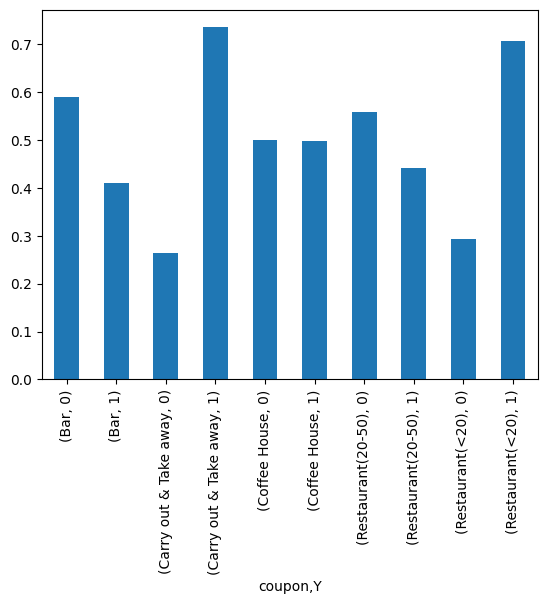

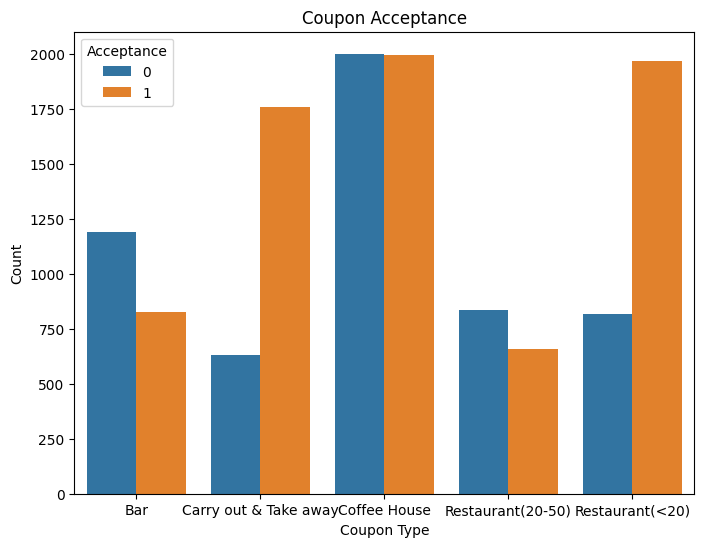

In [45]:
# visualizing each coupon by their accept/reject count makes more sense
## create a bar plot of the above as percentage
data.groupby(['coupon']).Y.value_counts(normalize=True).sort_index().plot(kind='bar')

## create sns barplot for the same as absolute counts
plt.figure(figsize=(8, 6))
g = sns.barplot(data=data.groupby(['coupon', 'Y']).Y.count().reset_index(name='count'), x='coupon', y='count', hue='Y')
plt.title('Coupon Acceptance')
plt.ylabel('Count')
plt.xlabel('Coupon Type')
plt.legend(title='Acceptance')
g.figure.savefig('images/coupon_acceptance_overall.png', dpi=300, bbox_inches='tight')
plt.show()

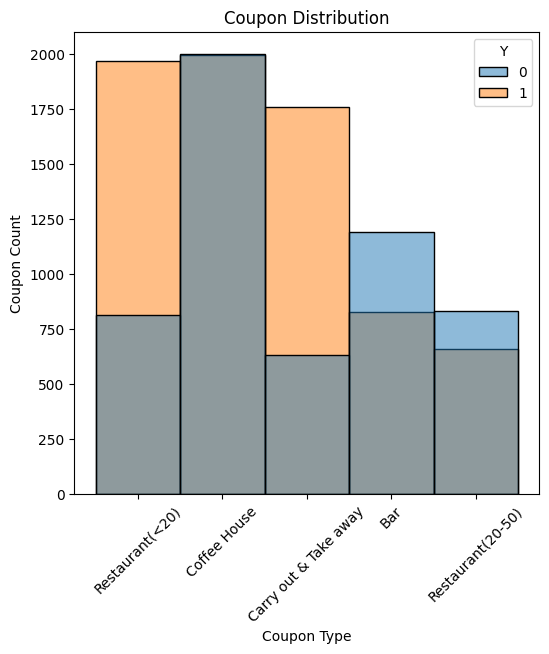

In [46]:
# useing a histogram to plot the same - self learning and exploration

plt.figure(figsize=(6, 6))
# plt.hist(data.coupon)
# plt.bar(data.coupon.value_counts().index, data.coupon.value_counts())
sns.histplot(x='coupon', data=data, hue='Y')

plt.xlabel('Coupon Type')
plt.ylabel('Coupon Count')
plt.title('Coupon Distribution')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

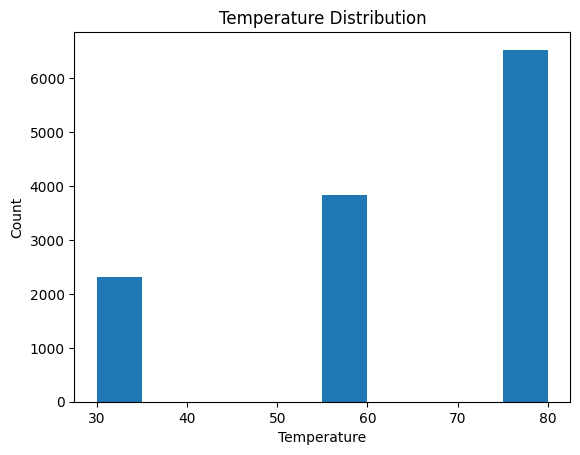

In [47]:
plt.hist(data.temperature)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()

# this plot doesnt give us much info other than the fact that we have more data for higher temperatures
# maybe the coupon distribution (even if it was a denial) is higher during warmer days

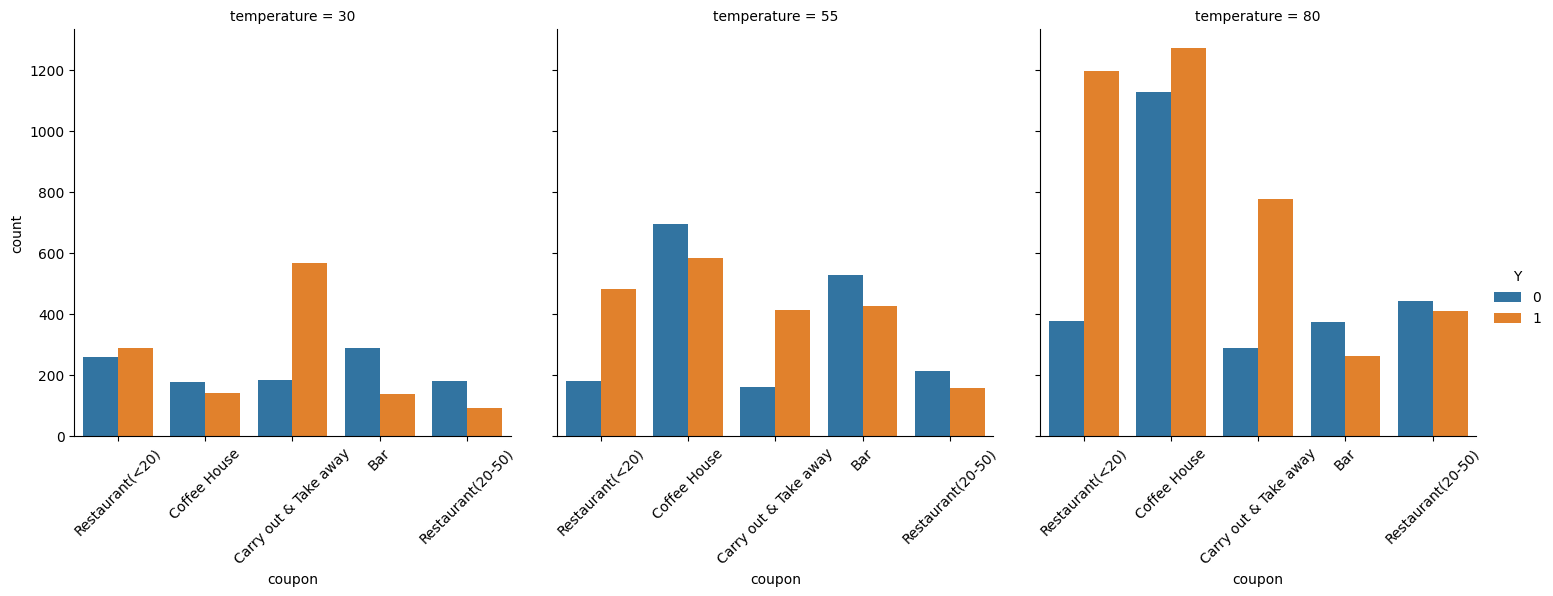

In [48]:
g = sns.catplot(data=data, x='coupon', hue='Y', col='temperature', kind='count', errorbar=None)
g.set_xticklabels(rotation=45)
g.figure.savefig('images/coupon_acceptance_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

## analysis:
# in general we have more coupon info for warmer weather
# in cold weather coupon denial is much higer (except for carryout)
# in warmer weather cheap restaurants, and carrout & take away acceptance spike up
#

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [49]:
df_bar = data[data.coupon == 'Bar']
df_bar = df_bar.dropna(subset=['Bar'])
df_bar.shape

(1996, 27)

2. What proportion of bar coupons were accepted?


In [50]:
print(data[data.coupon == 'Bar'].Y.value_counts(normalize=True))
print(data.query('coupon == "Bar"').Y.value_counts(normalize=True))

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64
Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [51]:
# Categorize people based on bar frequency: 'never' 'less1' '1~3' '4~8' 'gt8'
df_bar['bar_group'] = df_bar['Bar'].apply(lambda x: '≤3' if x in ['never', 'less1', '1~3'] else '>3')

total = df_bar.groupby('bar_group')['Y'].count() # Calculate total per group
accepted = df_bar[df_bar['Y'] == 1].groupby('bar_group')['Y'].count() # Calculate accepted (Y==1) per group
acceptance_rate = (accepted / total).reset_index(name='acceptance_rate') # Calculate acceptance rate

display(acceptance_rate)

,bar_group,acceptance_rate
0,>3,0.768844
1,≤3,0.370618


In [52]:
# Calculate total per group without collating based on < 3
total = data[data['coupon'] == 'Bar'].groupby('Bar')['Y'].count()
# Calculate accepted (Y==1) per group
accepted = data[((data['coupon'] == 'Bar') & data['Y'] == 1)].groupby('Bar')['Y'].count()

# Calculate acceptance rate
acceptance_rate = (accepted / total).reset_index(name='acceptance_rate')

display(total)
display(accepted)
display(acceptance_rate)

,Y
Bar,
1~3,397
4~8,150
gt8,49
less1,570
never,830


,Y
Bar,
1~3,257
4~8,117
gt8,36
less1,253
never,156


,Bar,acceptance_rate
0,1~3,0.647355
1,4~8,0.780000
2,gt8,0.734694
3,less1,0.443860
4,never,0.187952


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [53]:
df = data[data.coupon == 'Bar']
# Define the group: bar > once a month and age > 25
# 'below21', '21', '26', '31', '36', '41', '46', '50plus'
group1 = df[df['Bar'].isin(['1~3', '4~8', 'gt8']) & (df['age'].isin(['26', '31', '36', '41', '46', '50plus']))]

# Group 2: all others
group2 = df[~df.index.isin(group1.index)]

# Acceptance rate = mean of Y (since Y is binary 1/0)
rate1 = group1['Y'].mean()
rate2 = group2['Y'].mean()

print(f"Group 1 (bar > once/month & age > 25) acceptance rate: {rate1:.4f} vs all others: {rate2:.4f}")

## from the acceptance rate we see people in Group 1 have a much higher chance of accepting the coupon (70 to 30)

Group 1 (bar > once/month & age > 25) acceptance rate: 0.6952 vs all others: 0.3350


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
df = data[data.coupon == 'Bar']

group1 = df[df['Bar'].isin(['1~3', '4~8', 'gt8']) & (df['passenger'] != 'Kid(s)') & (~df['occupation'].isin(['Farming', 'Fishing', 'Forestry']))]
group2 = df[~df.index.isin(group1.index)]

rate1 = group1['Y'].mean()
rate2 = group2['Y'].mean()

print(f"(bar > once/month & passanger != Kids && occupation != Farming/Fishing/Forestry) acceptance rate: {rate1:.4f} vs all others: {rate2:.4f}")

## similarly people in group 1 here have a higher probability of coupon acceptance

(bar > once/month & passanger != Kids && occupation != Farming/Fishing/Forestry) acceptance rate: 0.7132 vs all others: 0.2960


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [57]:
df = data[data.coupon == 'Bar']

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1 = df[df['Bar'].isin(['1~3', '4~8', 'gt8']) & (df['passenger'] != 'Kid(s)') & (~df['maritalStatus'].isin(['Widowed']))]
group2 = df[~df.index.isin(group1.index)]
rate1 = group1['Y'].mean()
rate2 = group2['Y'].mean()
print(f"Group 1 (bar > once/month & passenger != Kids && maritalStatus != Widowed) acceptance rate: {rate1:.4f} vs all others: {rate2:.4f}")

# go to bars more than once a month and are under the age of 30
group3 = df[df['Bar'].isin(['1~3', '4~8', 'gt8']) & (df['age'].isin(['below21', '21', '26']))]
group4 = df[~df.index.isin(group3.index)]
rate3 = group3['Y'].mean()
rate4 = group4['Y'].mean()
print(f"Group 3 (bar > once/month & age < 30) acceptance rate: {rate3:.4f} vs all others: {rate4:.4f}")

# go to cheap restaurants more than 4 times a month and income is less than 50K
# print(data.shape)
df2 = data[data.coupon == 'Restaurant(<20)']
df2 = df.dropna(subset=['Restaurant(<20)'])
# df2.shape

# 'never' 'less1' '1~3' '4~8' 'gt8' nan
# 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'
group5 = df2[df2['Restaurant(<20)'].isin(['4~8', 'gt8']) & (df2['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]
group6 = df2[~df2.index.isin(group5.index)]
rate5 = group5['Y'].mean()
rate6 = group6['Y'].mean()
print(f"Group 5 (go to cheap restaurants > 4 times a month and income < 50K) acceptance rate: {rate5:.4f} vs all others: {rate6:.4f}")


Group 1 (bar > once/month & passenger != Kids && maritalStatus != Widowed) acceptance rate: 0.7132 vs all others: 0.2960
Group 3 (bar > once/month & age < 30) acceptance rate: 0.7217 vs all others: 0.3457
Group 5 (go to cheap restaurants > 4 times a month and income < 50K) acceptance rate: 0.4535 vs all others: 0.3994


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## for the bar scenario, we see people who go to bar > once/month always have ~ 70% probability of accepting the coupon
## irrespective of whether they are > 25 years, or have non kid as a passenger or if they are < 30 years
## Just going to the bar > once/month increases the odds of accepting the coupon

## for the cheap restaurants we see a 45% probability. So there is no strong relationship towards coupon acceptance/denial for this group of people

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

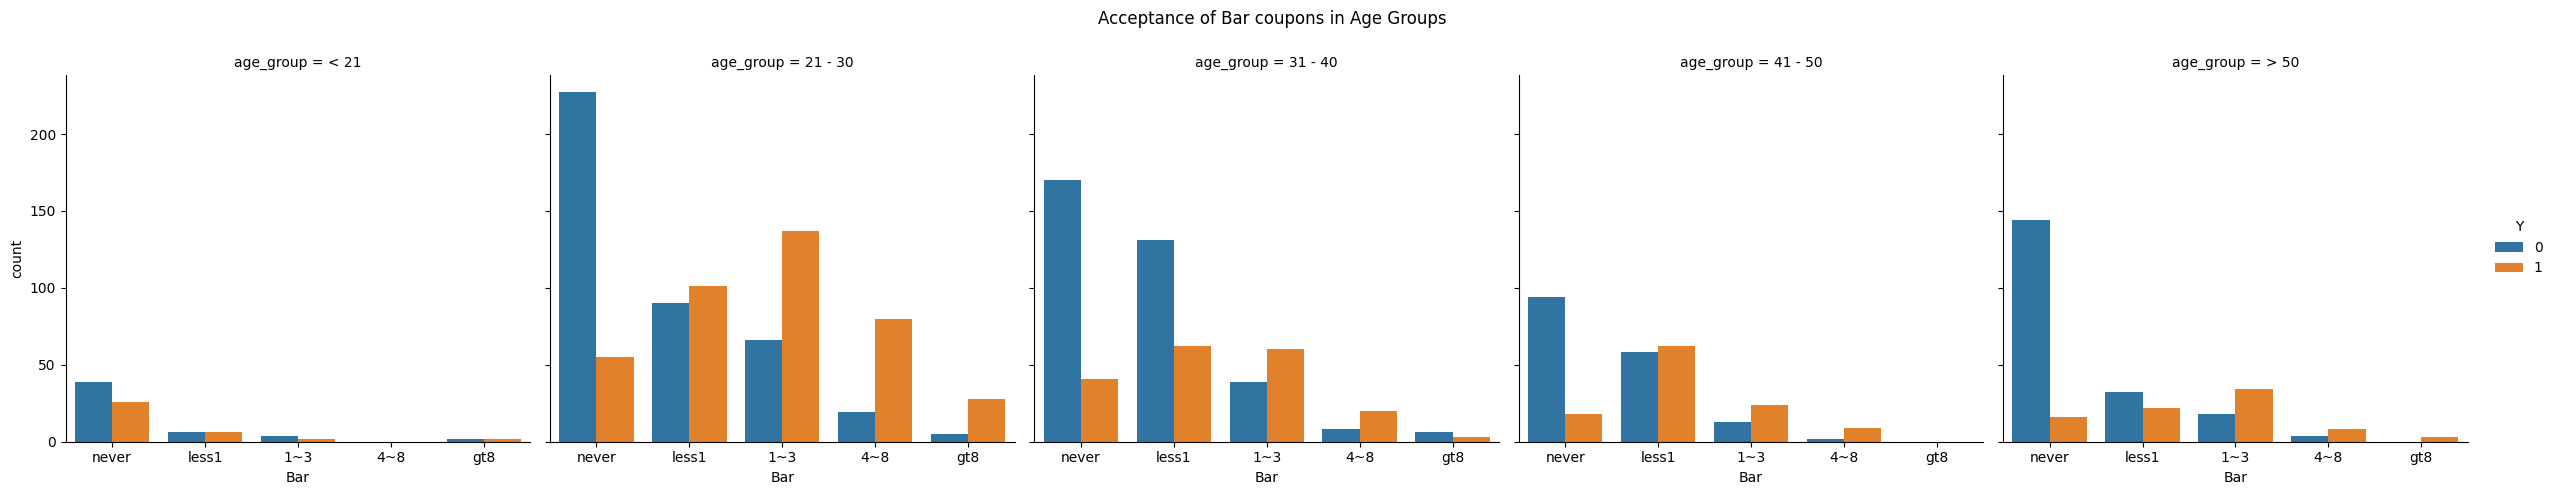

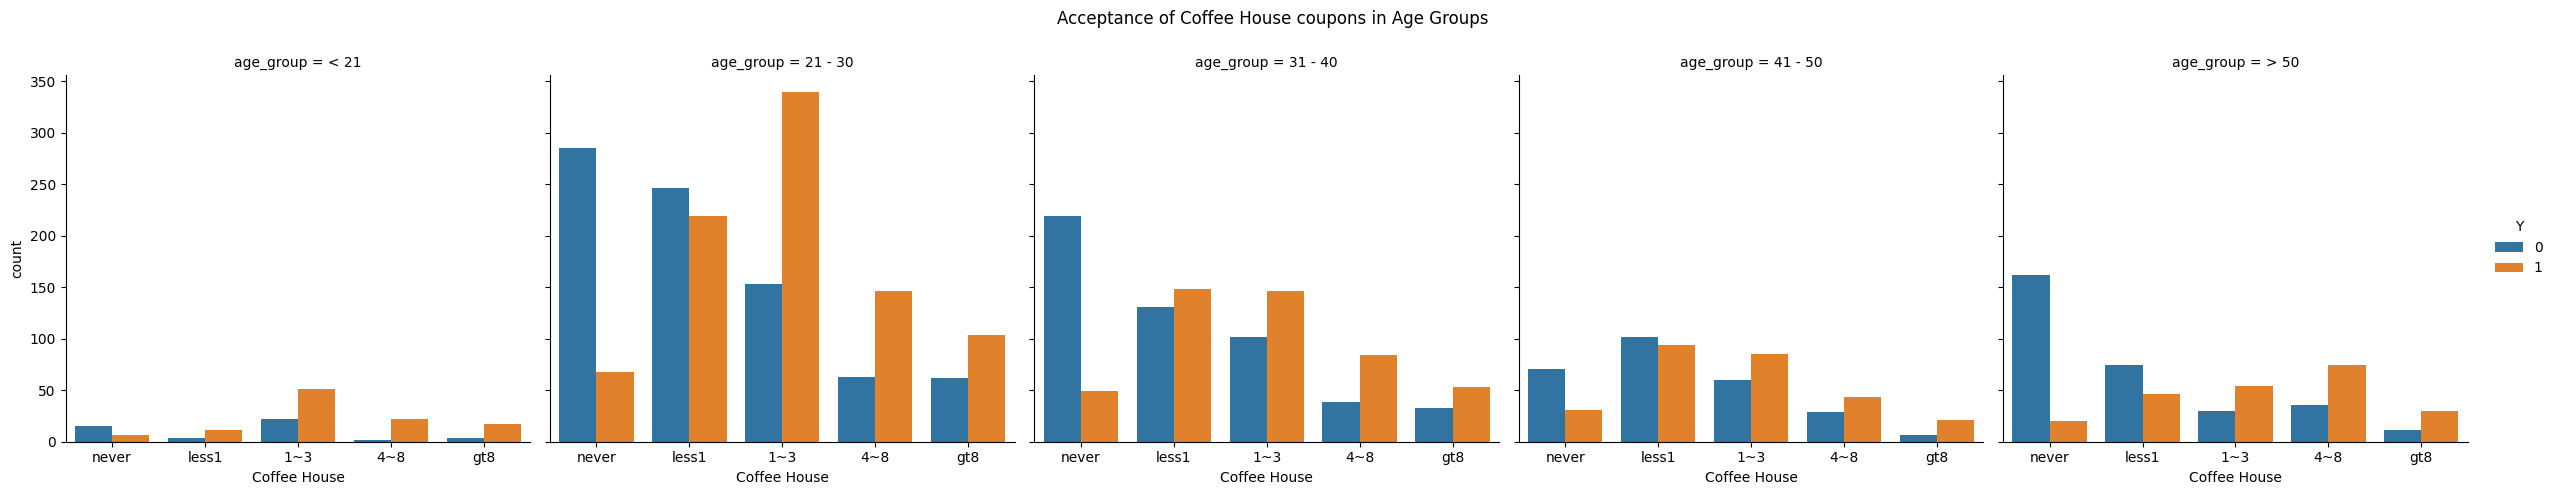

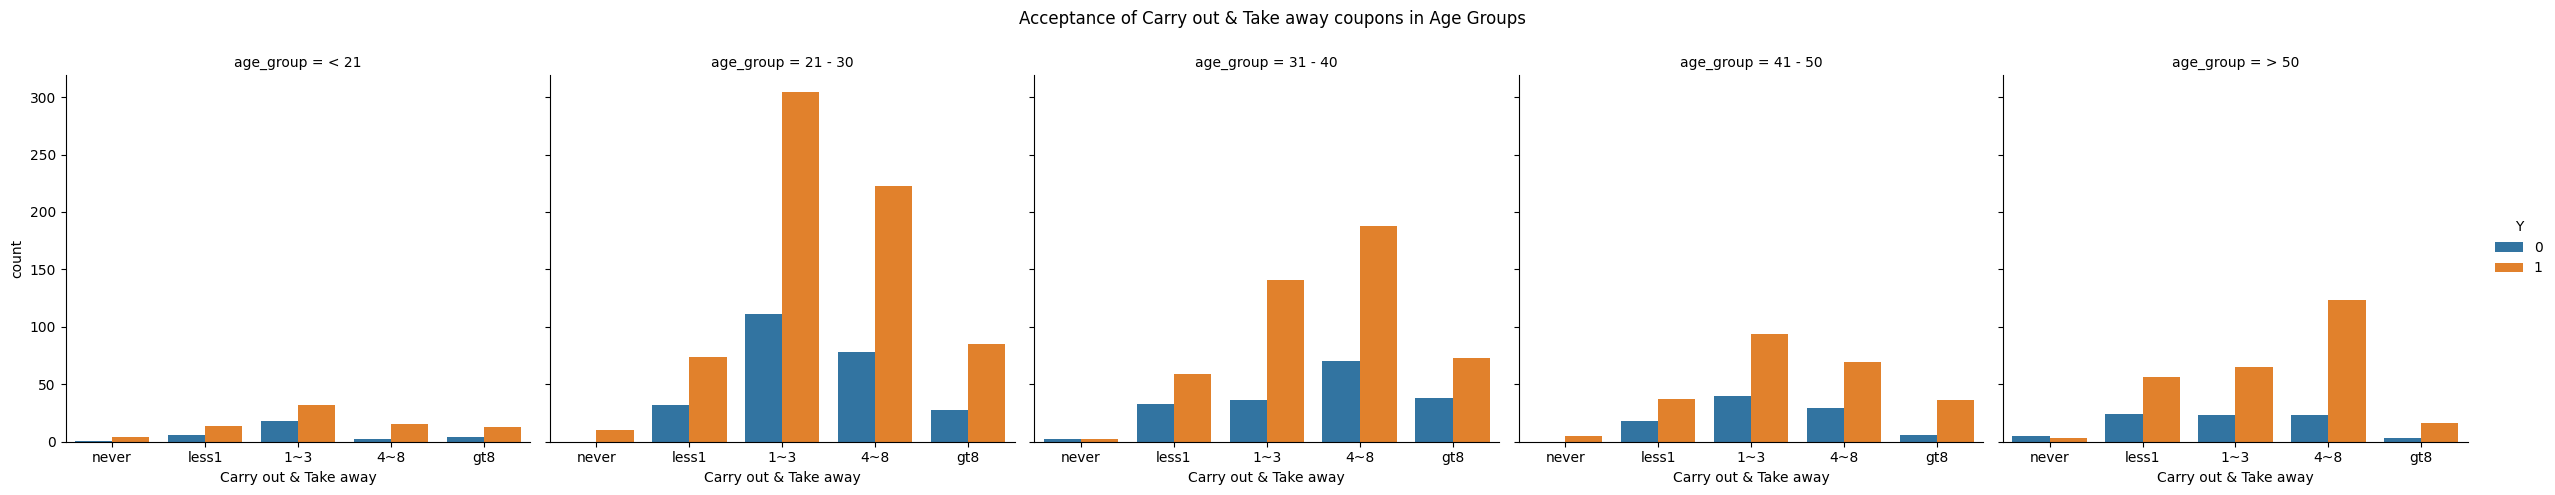

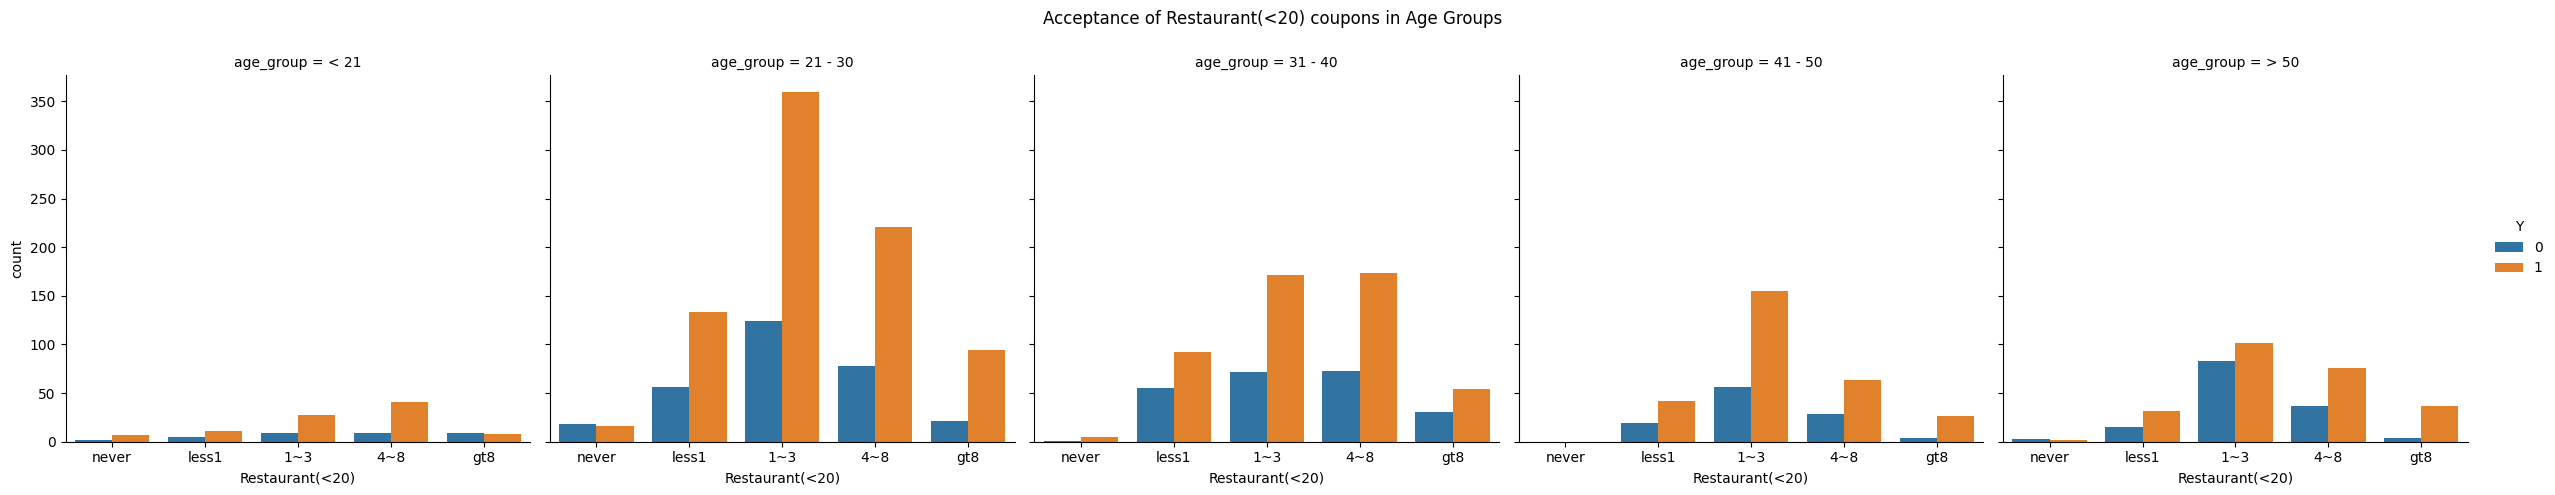

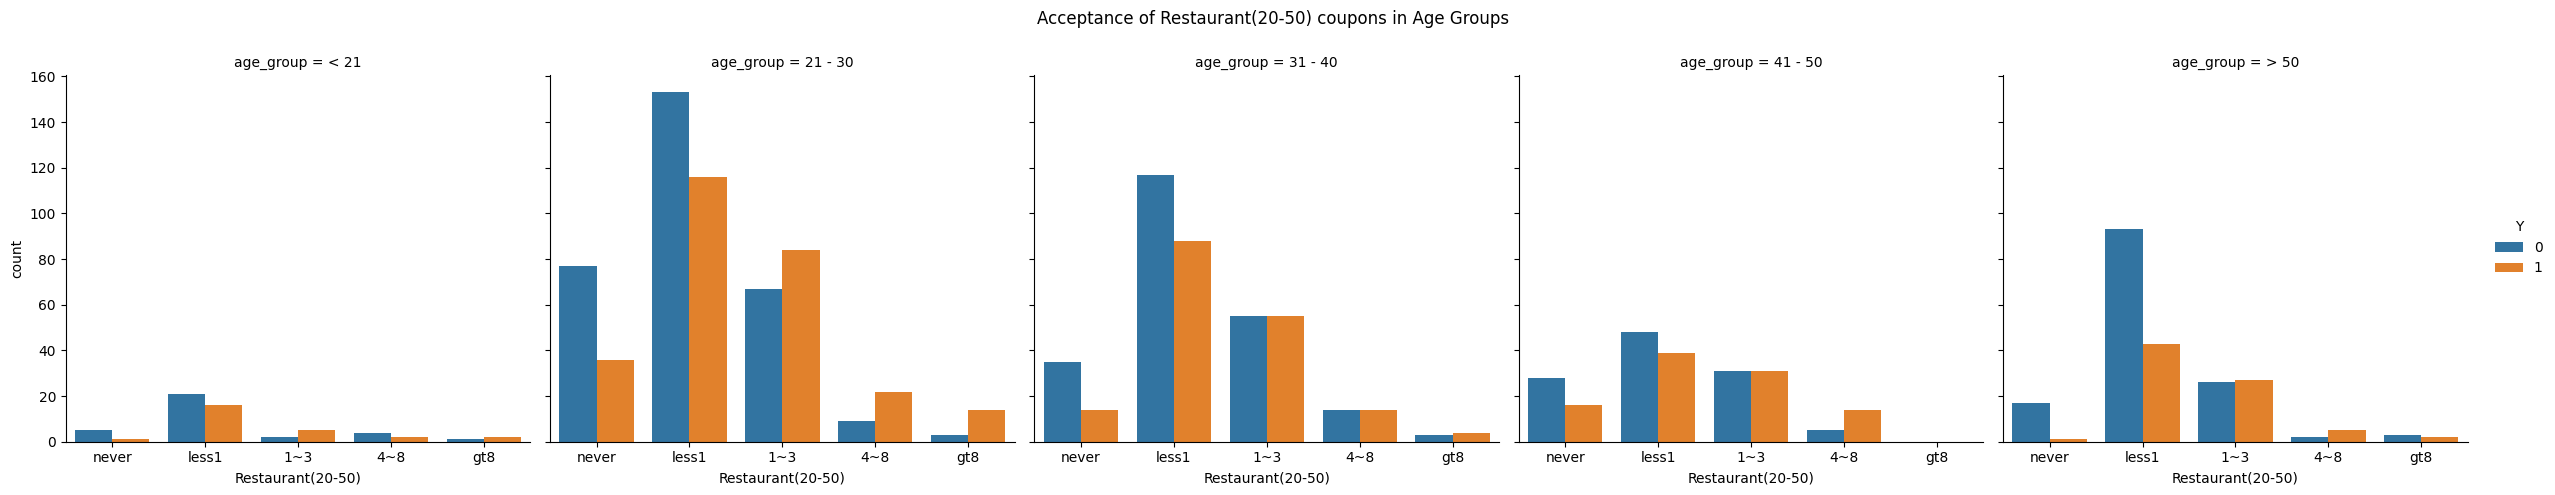

In [58]:
## Plotting all coupon types (accept vs denial) across age groups

coupons = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']

x_order = ['never', 'less1', '1~3', '4~8', 'gt8']
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age_group_order = ['< 21', '21 - 30', '31 - 40', '41 - 50', '> 50']

for coupon in coupons:
    g = sns.catplot(data=data[data.coupon == f'{coupon}'], x=coupon, hue='Y', col='age_group', col_order=age_group_order, order=x_order, kind='count')
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Acceptance of {coupon} coupons in Age Groups")
    g.figure.savefig(f'images/coupon_acceptance_{coupon}.png', dpi=300, bbox_inches='tight')
    plt.show()

## Observation
## 21-30 has the most data points, followed by 31-40
## these two groups also have the highest acceptance-to-denial ratio meaning the odds of acceptance are much higher (particulalry in 21-40)
## CoffeeHouse, CarryOut and Cheap restaurants have the highest acceptance rate for folks who visit 1-3 and 4-8
## People who have never been to a Bar or Coffee House have the highest denial ratio for 21-30 and 31-40 age groups

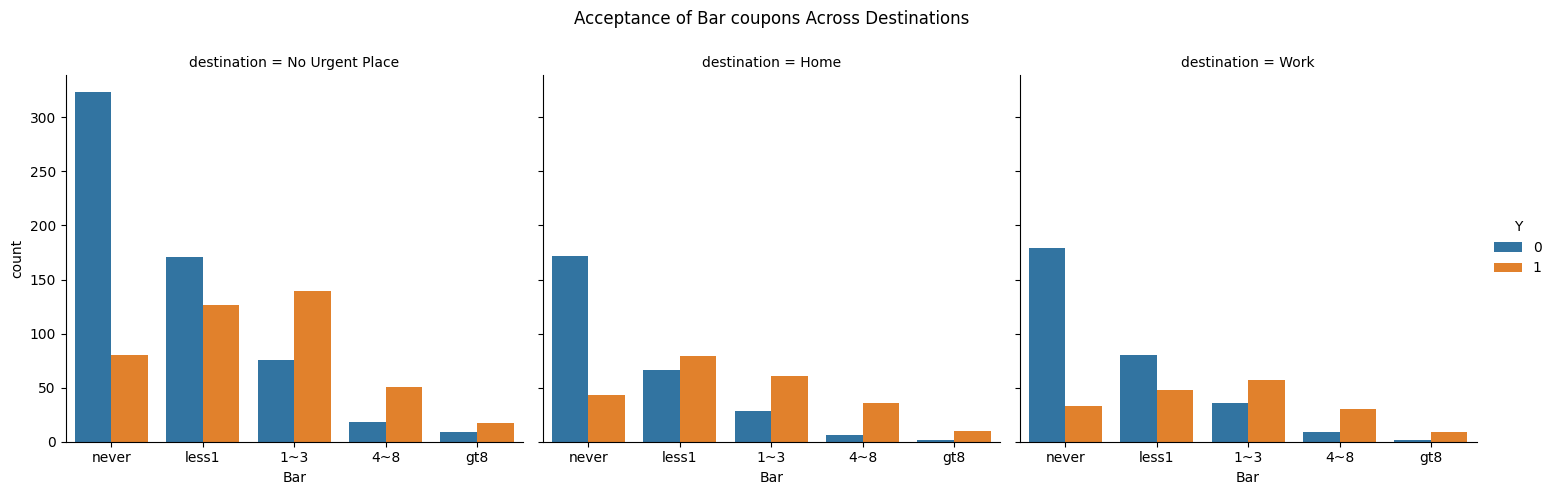

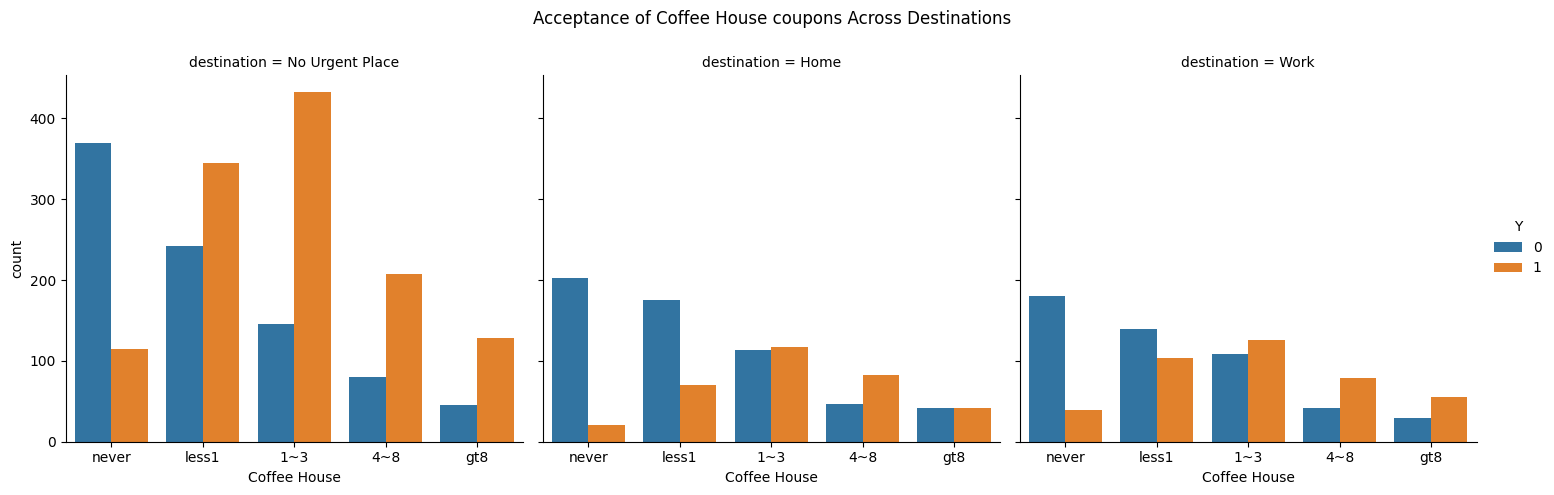

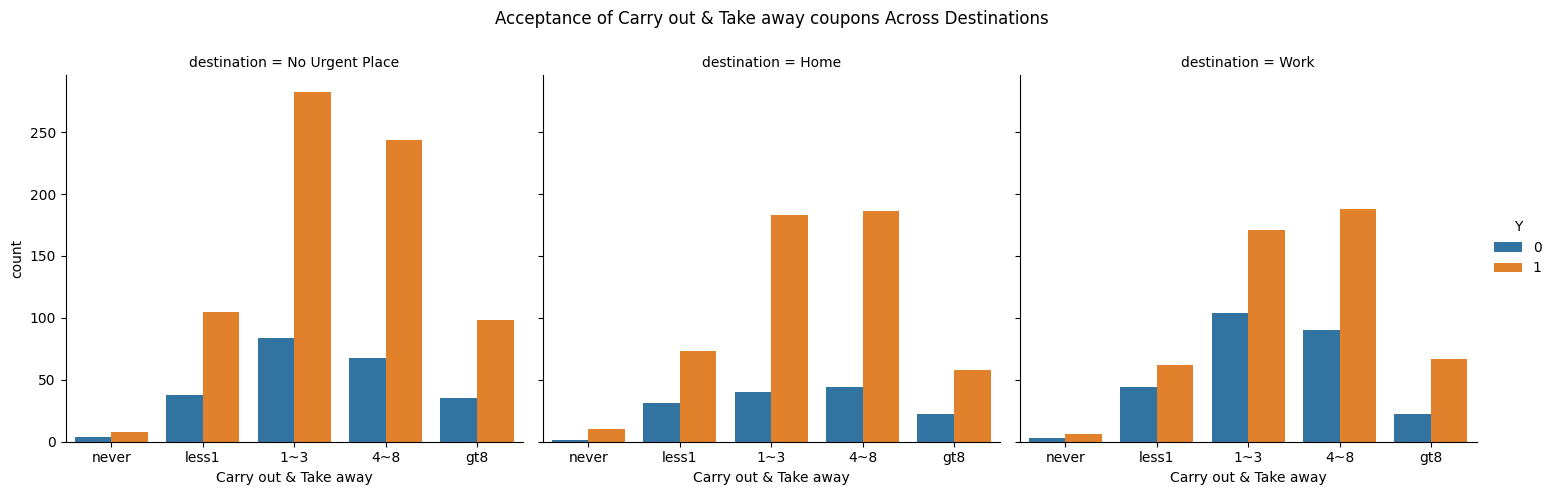

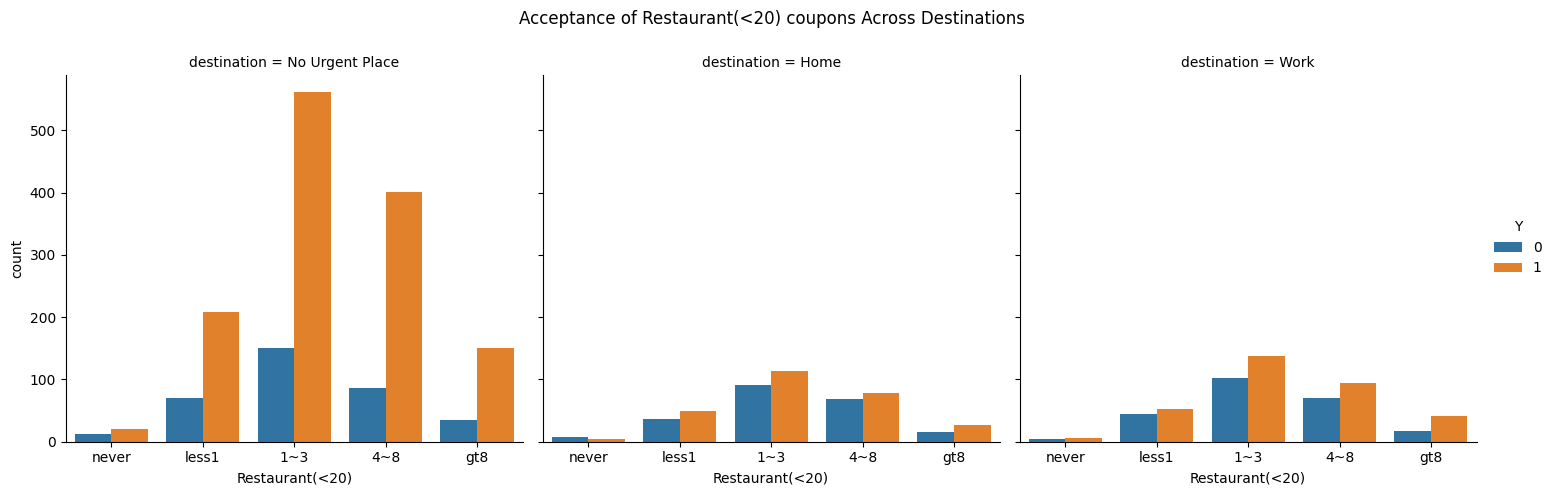

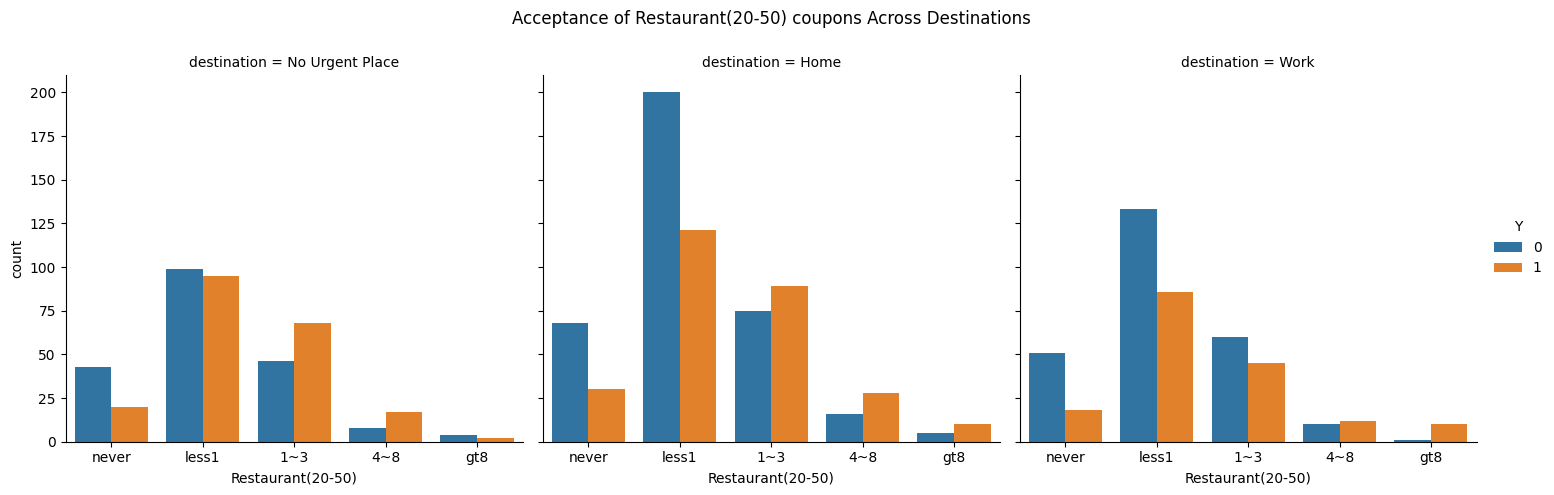

In [59]:
## Plotting all coupon types (accept vs denial) across destination

coupons = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']
x_order = ['never', 'less1', '1~3', '4~8', 'gt8']
dest_order = ['No Urgent Place', 'Home', 'Work']

for coupon in coupons:
    g = sns.catplot(data=data[data.coupon == f'{coupon}'], x=coupon, hue='Y', col='destination', col_order=dest_order, order=x_order, kind='count')
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Acceptance of {coupon} coupons Across Destinations")
    g.figure.savefig(f'images/coupon_acceptance_{coupon}_destination.png', dpi=300, bbox_inches='tight')
    plt.show()

## Observations
## people who are not traveling to an Urgent destination have more data points and higher odds of accepting a coupon
## this is true across all coupon types
##

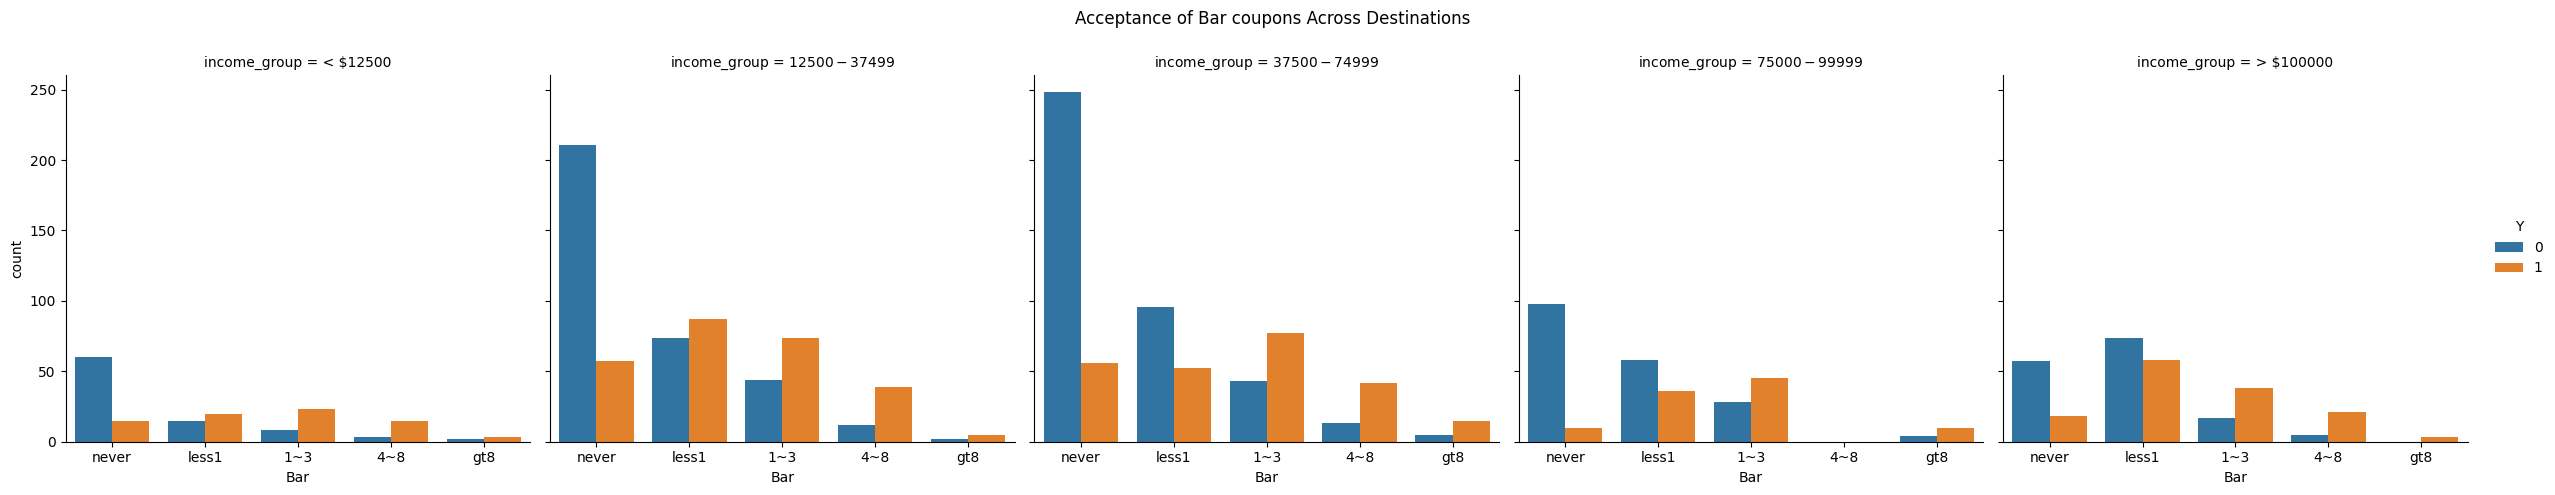

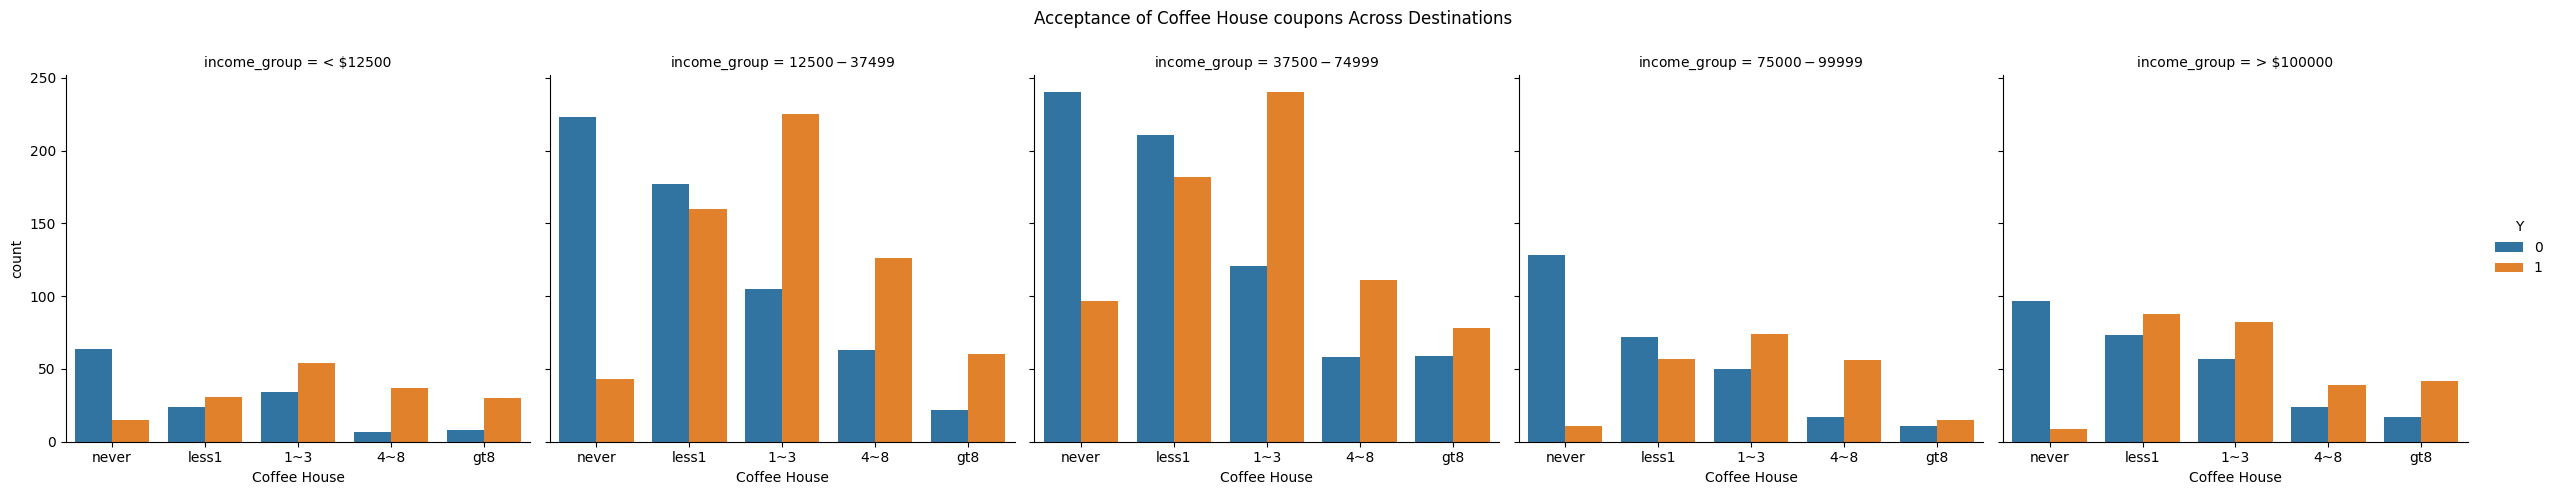

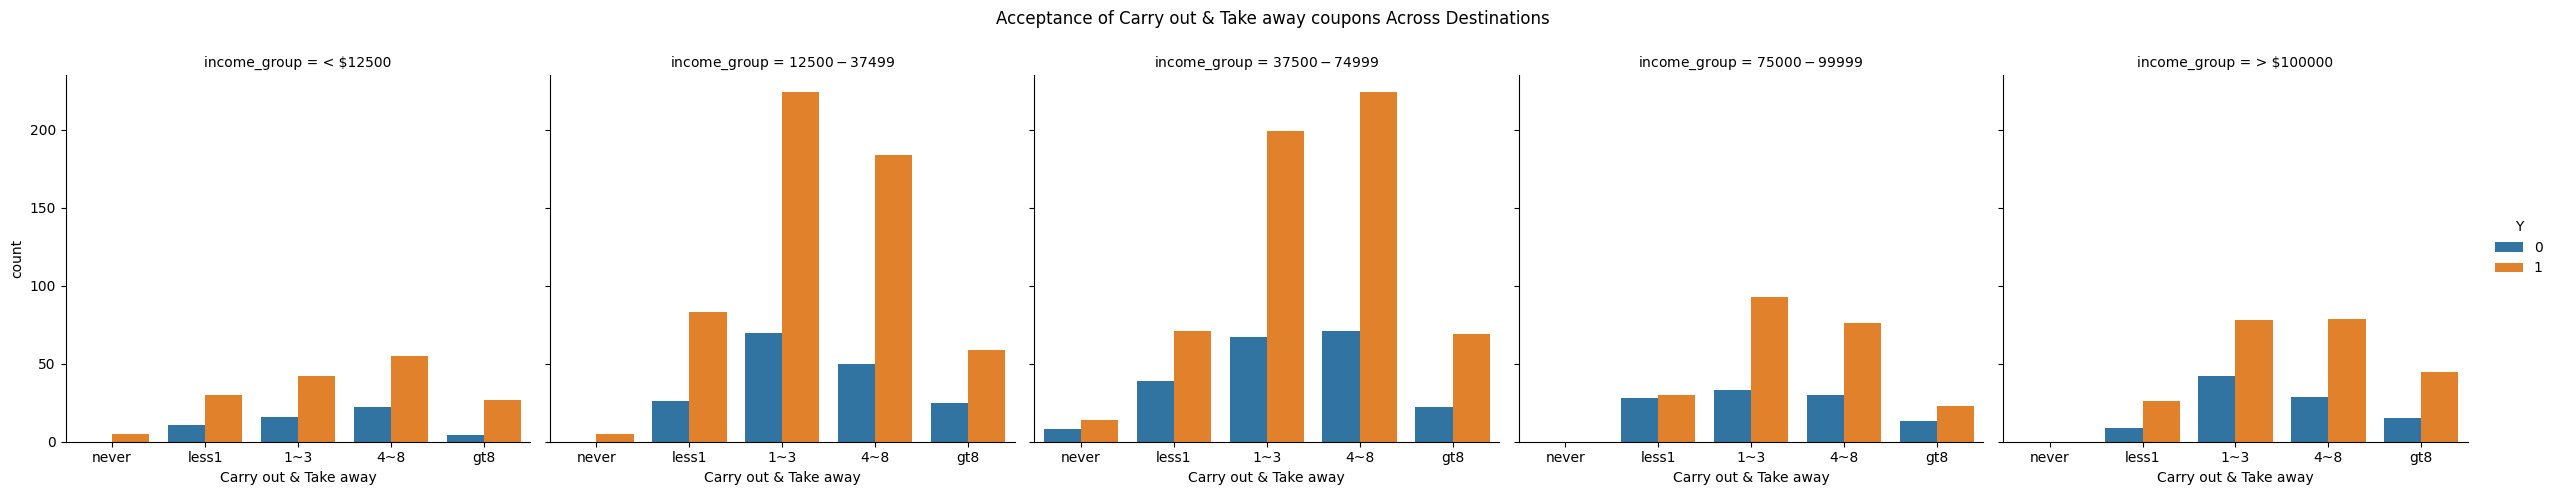

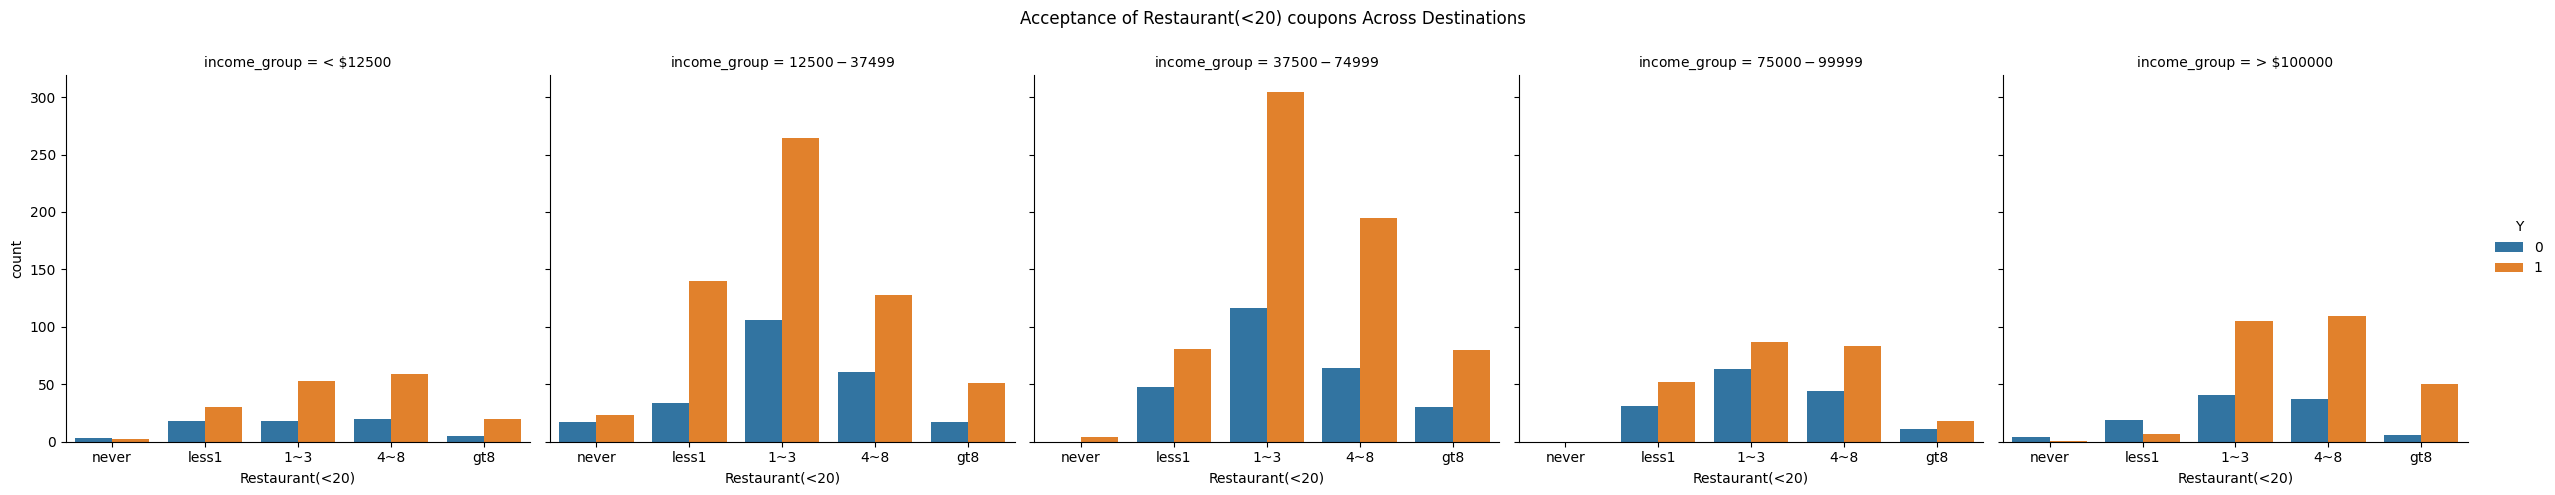

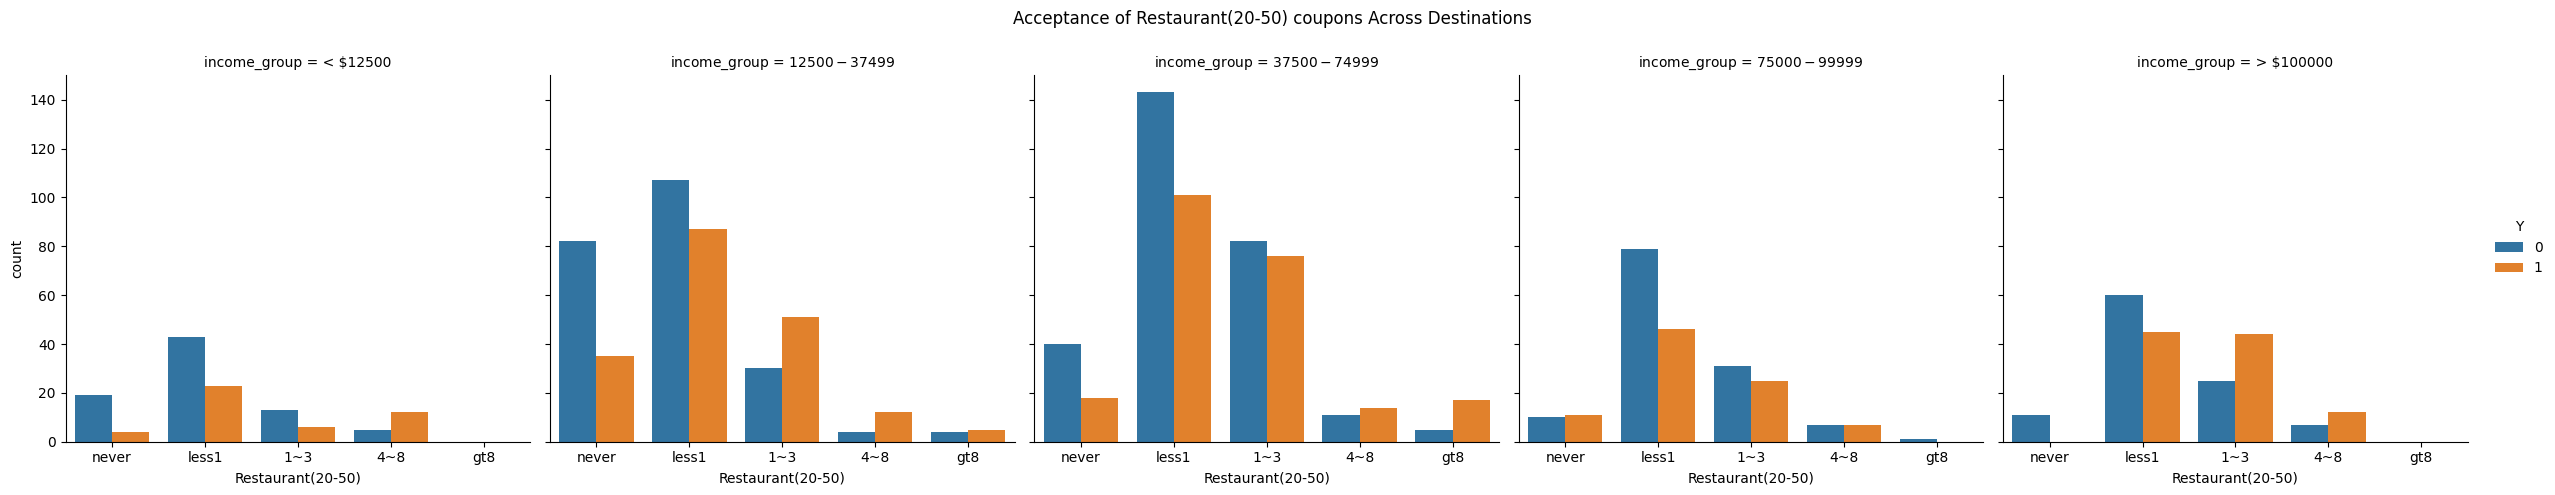

In [60]:
## Plotting all coupon types (accept vs denial) across income groups

coupons = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']
x_order = ['never', 'less1', '1~3', '4~8', 'gt8']
income_order = ['< $12500', '$12500 - $37499', '$37500 - $74999', '$75000 - $99999', '> $100000']
for coupon in coupons:
    sns.catplot(data=data[data.coupon == f'{coupon}'], x=coupon, hue='Y', col='income_group', col_order=income_order, order=x_order, kind='count')
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Acceptance of {coupon} coupons Across Destinations")

## Observations
## we have more data points across 12500-37499 and 37500-74999
## the odds of accepting the coupon is also higher in this group

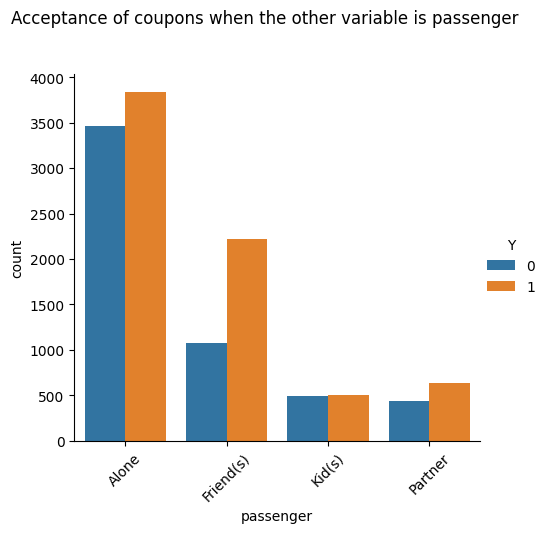

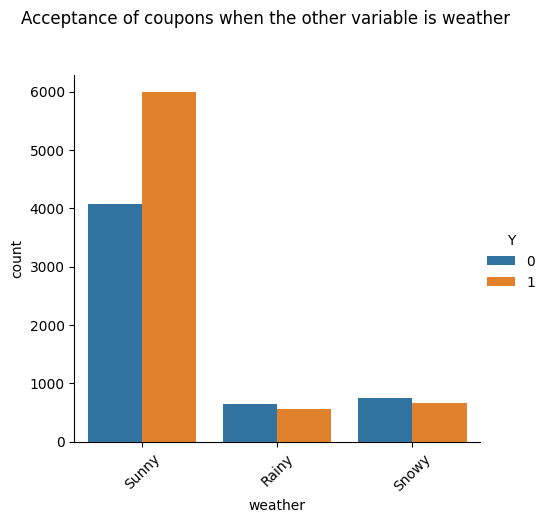

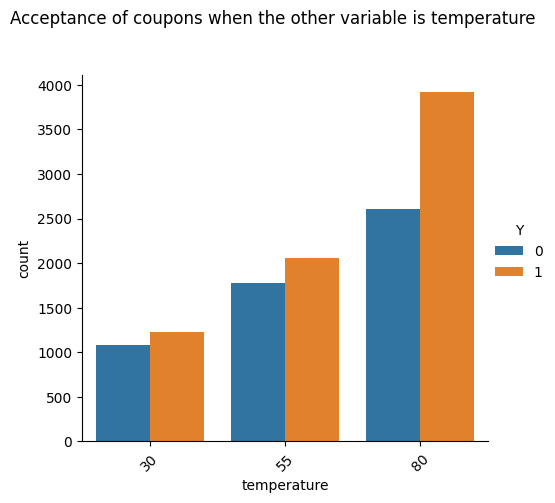

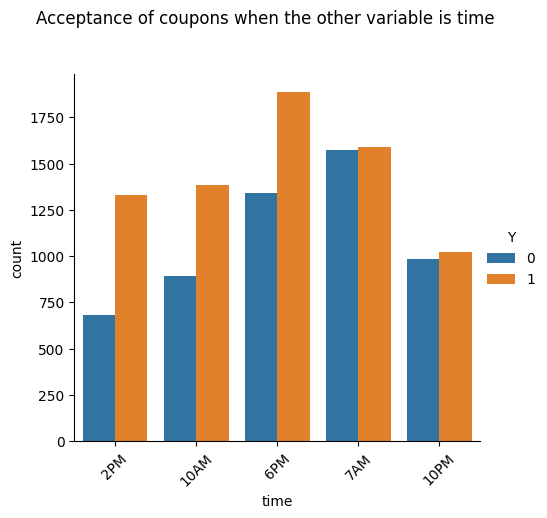

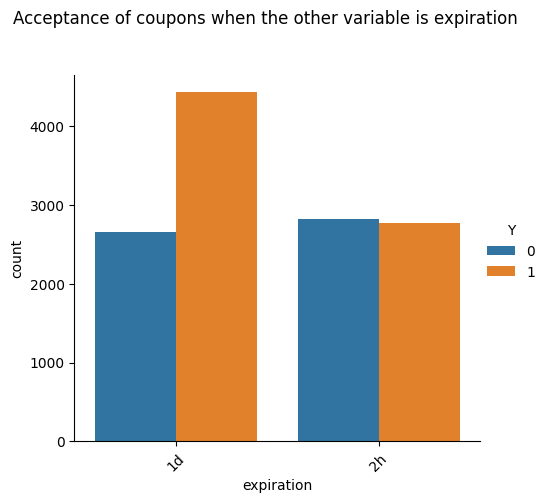

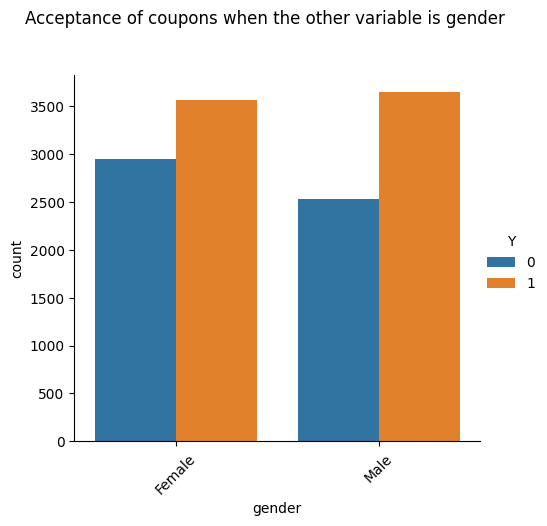

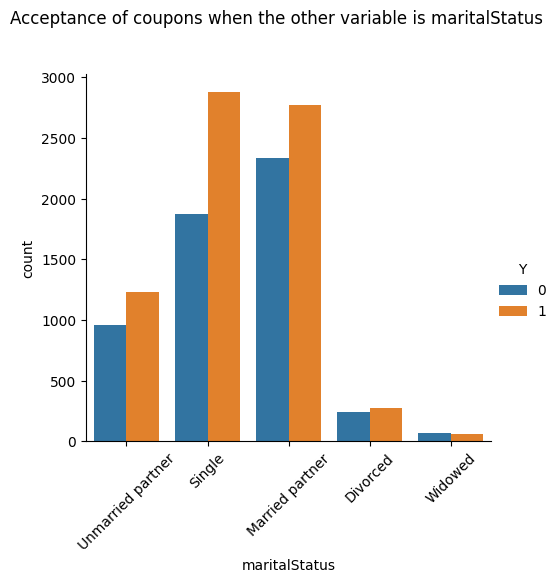

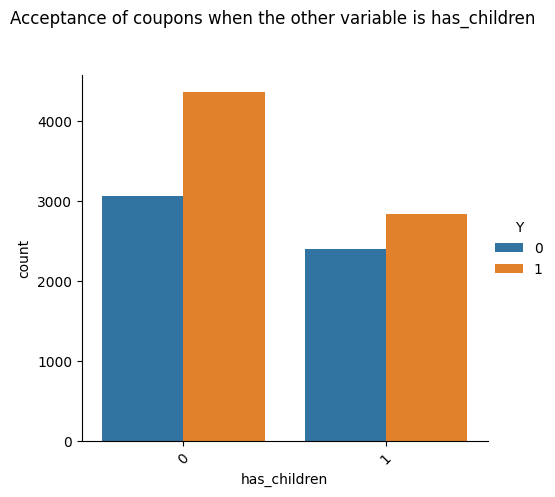

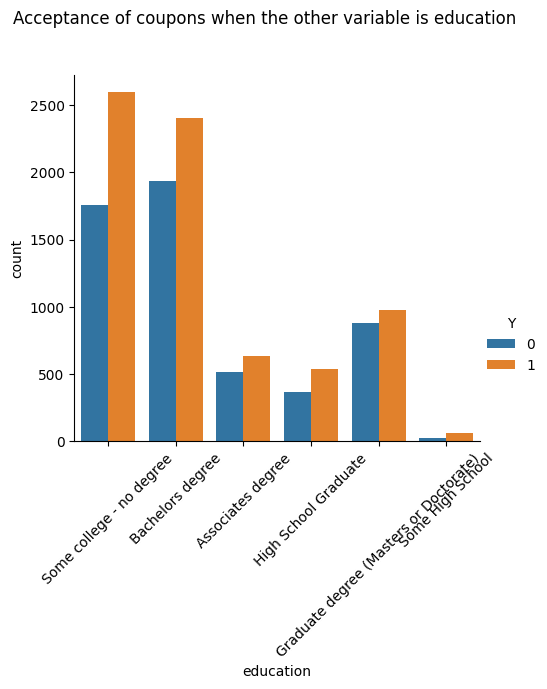

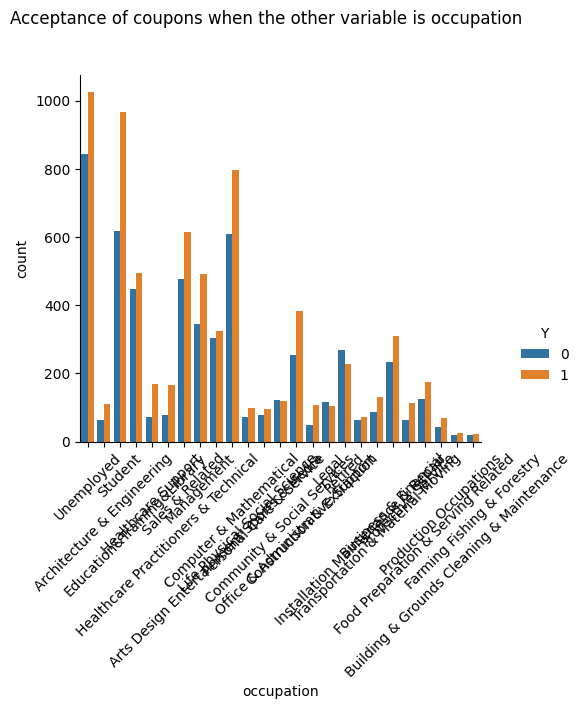

In [61]:
## plot other features to coupon acceptance ratio (without going by each coupon type)

x_variables = ['passenger', 'weather', 'temperature', 'time', 'expiration', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation']
for x_var in x_variables:
    g = sns.catplot(data=data, x=x_var, hue='Y', kind='count')
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Acceptance of coupons when the other variable is {x_var}")
    plt.xticks(rotation=45)
    g.figure.savefig(f'images/coupon_acceptance_{x_var}_count.png', dpi=300, bbox_inches='tight')
    plt.show()

## Observation
## more data points (and probability of acceptance) for people traveling alone and with friends
## sunny weather and also 80 degrees (both are similar) leads to more acceptance
## 2pm and 6pm gives more odds of acceptance
## coupons with 1d validity has mmore odds
## gender doesnt necessarily play an important role
## people who are single, or married (and also have children) have a higher chance


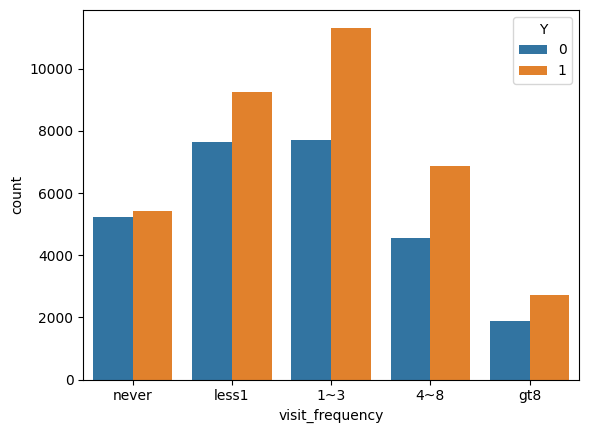

In [62]:
# coupon count per frequency of visit
coupons = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']
x_order = ['never', 'less1', '1~3', '4~8', 'gt8']

all_counts = []
for coupon in coupons:
    df = data.groupby([f'{coupon}', 'Y'], as_index=False)['Y'].agg(['count'])
    df.rename(columns={coupon: 'visit_frequency'}, inplace=True)
    all_counts.append(df)

combined_df = pd.concat(all_counts)
# Concatenate all, then sum by visit_frequency and Y
summary = combined_df.groupby(['visit_frequency', 'Y'], as_index=False)['count'].sum()

sns.barplot(data=summary, x='visit_frequency', y='count', hue='Y', order=x_order)
plt.show()

<Axes: xlabel='Bar', ylabel='temperature'>

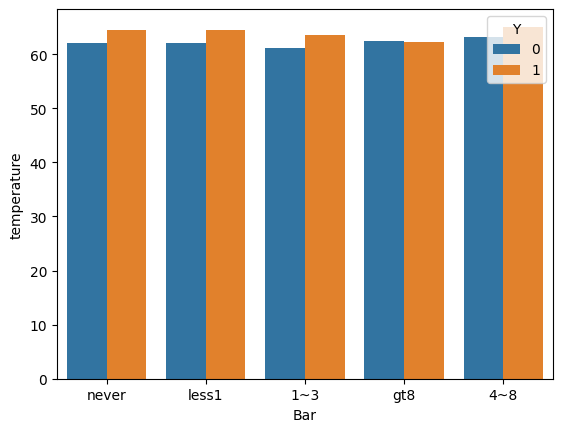

In [63]:
sns.barplot(data=data, x='Bar', y='temperature', hue='Y', errorbar=None)

## random observation attempt
## temperature doesnt have an effect on Bar goers predicatability of accepting or rejecting a coupon

In [64]:
data.groupby(['Bar', 'passenger'], as_index=False)['Y'].agg(['count', 'mean'])

## Observation attempt
## bivariate - combination of bar goer frequency + passenger to determine which group has
## a higher chance of accepting the coupon

,Bar,passenger,count,mean
0,1~3,Alone,1428,0.576331
1,1~3,Friend(s),648,0.722222
2,1~3,Kid(s),162,0.598765
3,1~3,Partner,235,0.638298
4,4~8,Alone,648,0.603395
5,4~8,Friend(s),320,0.709375
6,4~8,Kid(s),34,0.588235
7,4~8,Partner,74,0.648649
8,gt8,Alone,206,0.548544
9,gt8,Friend(s),125,0.592000
